In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import random 
import numpy as np 

In [2]:
filenames = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set/')

In [3]:
classification = []

for filename in filenames: 
    classify = filename.split('.')[0]
    
    if classify =='dog': 
        classification.append(1)
    else: 
        classification.append(0)
    
    

In [4]:
Animal_df = pd.DataFrame({ 

    'filelist':filenames,
    'Animal_class':classification
    })

In [5]:
Animal_df

,filelist,Animal_class
0,cat.1.jpg,0
1,cat.10.jpg,0
2,cat.100.jpg,0
3,cat.1000.jpg,0
4,cat.1001.jpg,0
...,...,...
7995,dog.995.jpg,1
7996,dog.996.jpg,1
7997,dog.997.jpg,1
7998,dog.998.jpg,1


In [6]:
from keras.preprocessing.image import load_img,ImageDataGenerator

Using TensorFlow backend.


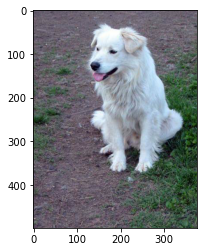

In [7]:
sample = random.choice(filenames)
img = load_img('C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set/' + sample)
plt.imshow(img)

In [51]:
# from keras.models import load_model

# models = load_model('./firstModel.h5')

# models.summary()

from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
from keras.models import Sequential 

models = Sequential()

models.add(Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3))) 
models.add(BatchNormalization()) 
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))


models.add(Conv2D(64,(3,3),activation='relu')) 
models.add(BatchNormalization()) 
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))


models.add(Conv2D(128,(3,3),activation='relu')) 
models.add(BatchNormalization()) 
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Conv2D(256,(3,3),activation='relu')) 
models.add(BatchNormalization()) 
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Flatten())
models.add(Dense(512,activation='relu')) 
models.add(BatchNormalization()) 
models.add(Dropout(0.25))
models.add(Dense(2,activation='softmax')) 

models.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
models.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_26 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_27 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 54, 54, 64)       

In [52]:
Animal_df.head()

,filelist,Animal_class
0,cat.1.jpg,cat
1,cat.10.jpg,cat
2,cat.100.jpg,cat
3,cat.1000.jpg,cat
4,cat.1001.jpg,cat


In [53]:
from sklearn.model_selection import train_test_split 

train_df,test_df = train_test_split(Animal_df,test_size=0.2)

In [54]:
Animal_df['Animal_class'] = Animal_df['Animal_class'].replace({0:'cat',1:'dog'})

In [55]:
train_generator = ImageDataGenerator( 


    shear_range=0.2, 
    horizontal_flip=True, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    zoom_range=0.3,
    rescale=1/255
    
)

train_datagenerator = train_generator.flow_from_dataframe( 
    train_df,
    'C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set',
    x_col='filelist',
    y_col='Animal_class',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 6400 validated image filenames belonging to 2 classes.


In [56]:
validation_generator = ImageDataGenerator(rescale=1./255)

validation_dataGenerator = validation_generator.flow_from_dataframe( 

    test_df,
   'C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set/',
    x_col='filelist',
    y_col='Animal_class', 
    target_size=(224,224),
    batch_size=64, 
    class_mode='categorical', 
    shuffle=True,
   
)

Found 1600 validated image filenames belonging to 2 classes.


In [57]:
example_df = test_df.sample(n=1)
example_generator = train_generator.flow_from_dataframe(

    example_df,
   'C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set',
    x_col='filelist',
    y_col= 'Animal_class', 
    target_size = (224,224), 
    batch_size = 64, 
    class_mode='categorical', 
    shuffle=True
    
    )

Found 1 validated image filenames belonging to 1 classes.


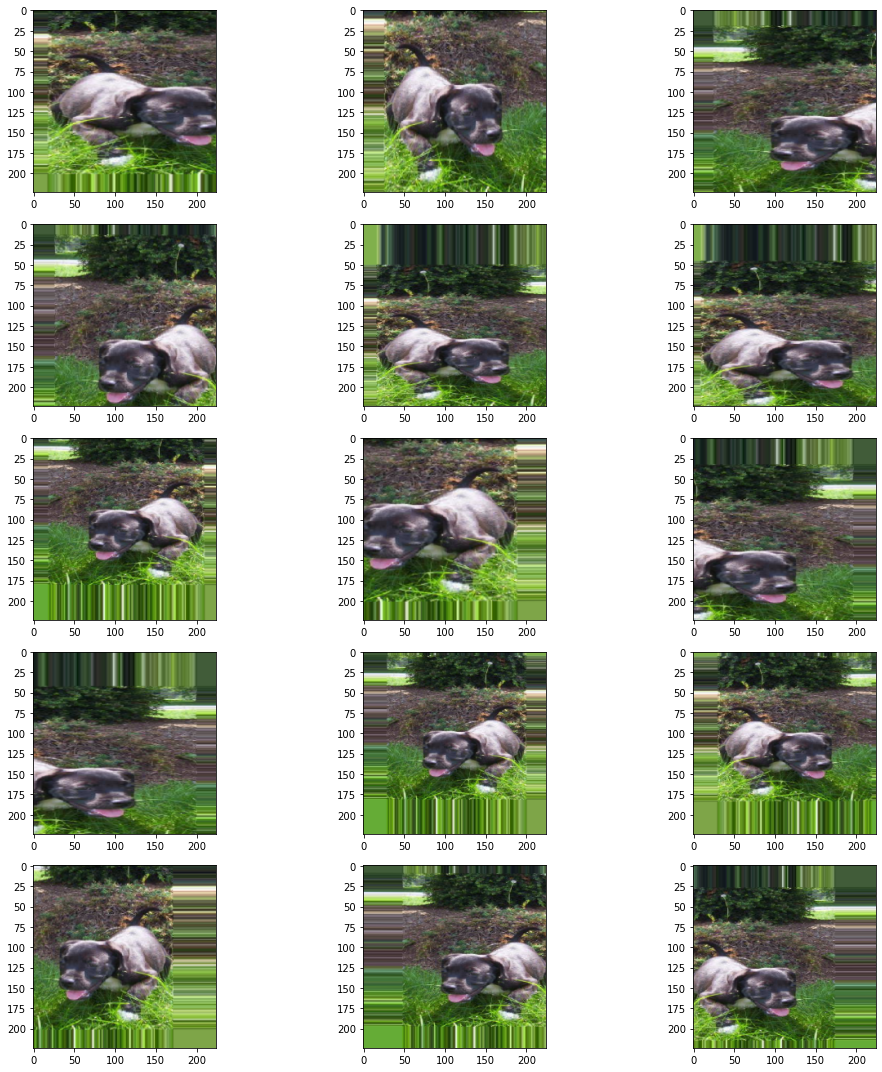

In [58]:
plt.figure(figsize=(15,15))

for i in range(0,15): 
    
    plt.subplot(5,3,i+1)
    for X_batch , Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
        
plt.tight_layout()
plt.show()

In [59]:
batch_size = 64
total_train = train_df.shape[0]//batch_size
total_valid = test_df.shape[0]//batch_size



In [60]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',verbose = 1 , factor=0.3,patince =3 ,min_lr=0.01)

In [61]:
predicted = models.fit_generator(train_datagenerator,
                                 steps_per_epoch=total_train,
                                 epochs=5,
                                 callbacks=[learning_rate_reduction],
                                 validation_data=train_datagenerator,
                                 validation_steps=total_valid,
                                 shuffle=True,)


Epoch 1/5
100/100 [==============================] - 47s 472ms/step - loss: 1.0235 - accuracy: 0.5578 - val_loss: 0.6798 - val_accuracy: 0.5300
Epoch 2/5
100/100 [==============================] - 44s 439ms/step - loss: 0.7794 - accuracy: 0.5756 - val_loss: 1.5664 - val_accuracy: 0.4800
Epoch 3/5
100/100 [==============================] - 41s 408ms/step - loss: 0.6978 - accuracy: 0.6284 - val_loss: 1.6109 - val_accuracy: 0.5075
Epoch 4/5
100/100 [==============================] - 40s 399ms/step - loss: 0.6833 - accuracy: 0.6253 - val_loss: 0.7028 - val_accuracy: 0.5288
Epoch 5/5
100/100 [==============================] - 41s 408ms/step - loss: 0.6388 - accuracy: 0.6525 - val_loss: 0.6922 - val_accuracy: 0.6062


In [62]:
test_filenames = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set')

test_df = pd.DataFrame({ 

    'filename': test_filenames})

nb_samples = test_df.shape[0]

In [66]:
test_gen= ImageDataGenerator(rescale=1/255) 

test_generator = test_gen.flow_from_dataframe( 

    test_df,
    'C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set',
    x_col='filename',
    y_col=None,
    class_mode=None, 
    batch_size=64,
    target_size=(224,224),
    shuffle=False
)

Found 8000 validated image filenames.


In [67]:
predict= models.predict_generator(test_generator , steps=np.ceil(nb_samples/batch_size))

In [72]:
predict

array([[0.7100438 , 0.28995615],
       [0.65616703, 0.34383297],
       [0.33858928, 0.66141075],
       ...,
       [0.59719455, 0.40280542],
       [0.28655934, 0.71344066],
       [0.37569335, 0.6243067 ]], dtype=float32)

In [69]:
test_df['category'] = np.argmax(predict,axis=-1)

In [74]:
label_map = dict((v,k) for k,v in train_datagenerator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [79]:
test_df['category'] = test_df['category'].replace({ 'dog':1, 'cat':0 })

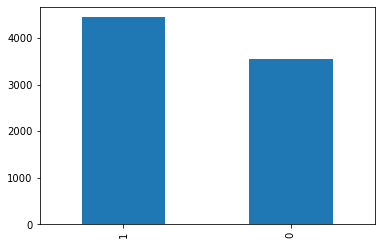

In [80]:
test_df['category'].value_counts().plot.bar()

In [98]:
sample_test = test_df.head(18)
sample_test.head()

,filename,category
0,cat.1.jpg,0
1,cat.10.jpg,0
2,cat.100.jpg,1
3,cat.1000.jpg,0
4,cat.1001.jpg,1


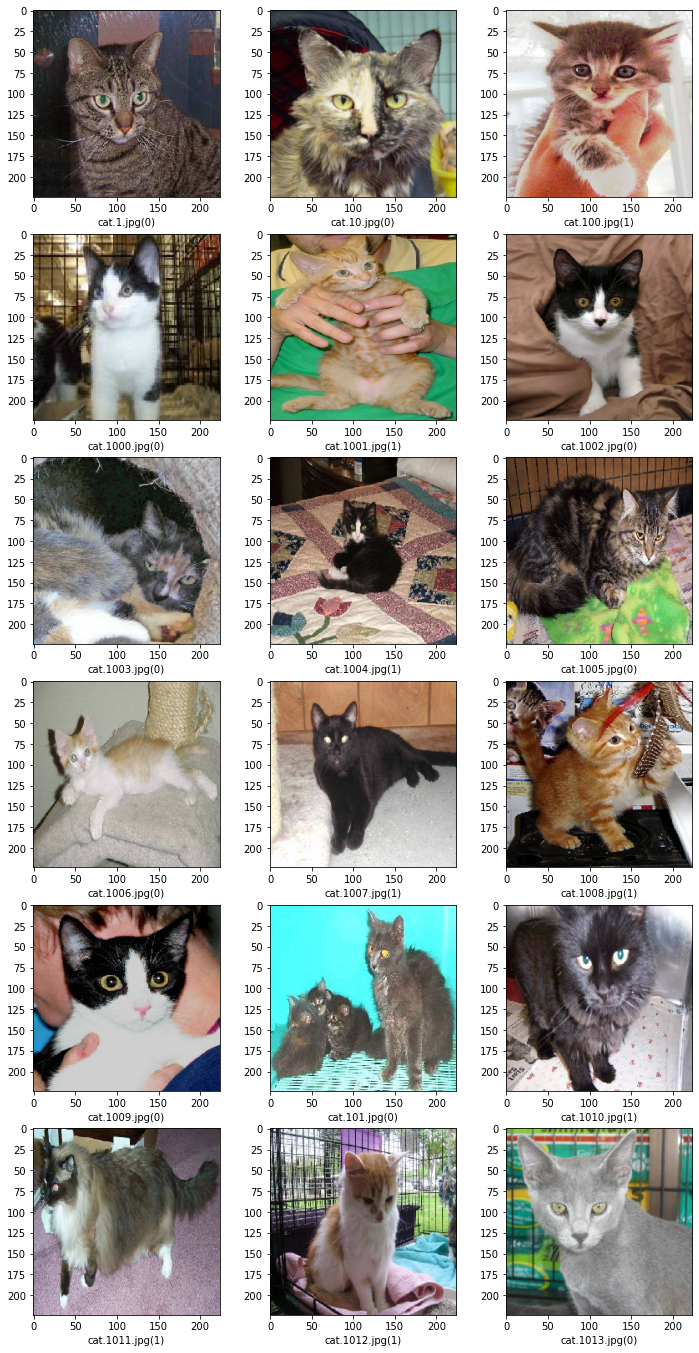

In [105]:
plt.figure(figsize=(12,24))
for index,row in sample_test.iterrows(): 
    filename = row['filename']
    category = row['category']
    plt.subplot(6,3,index+1)
    img = load_img('C:/Users/Lee Jong Ann/Desktop/dataset/CatsandDogs/dataset/training_set/'+filename , target_size=(224,224))
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')